<a href="https://colab.research.google.com/github/kyleegit27/wrangling_KL/blob/main/ML_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests

header ={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://miami.craigslist.org/search/miami-fl/boo?lat=25.73&lon=-80.529&query=jet%20skis&search_distance=31#search=1~gallery~0~0' #arlington toys & games on craigslist
raw = requests.get(url, headers = header) # get page

In [ ]:
#use beautifulSoup and bs4 -- parse local page for specific results
#view page source (what computer reads)
#tags - give info on where data lives + how to extricate it
#takes raw content from requests, turns into beautifulSoup object+ search the page
from bs4 import BeautifulSoup as soup #HTML parser
obj = soup(raw.content, 'html.parser')#parse the HTML
listings = obj.find_all(class_ = 'cl-static-search-result') #finds all the listings wanted
#use .find_all function to search whole page
#use .find method to search within the listing record, but typically wrapped in a tag
#use .get_text() function
#split title words with title.split()



In [ ]:
#use regular expressions for expressing patterns, nest in for-loop + append

import re #regular expressions
types = ['yamaha', 'sea doo']

#open data list
data = []

for k in range(len(listings)):
  title = listings[k].find('div', class_= 'title').get_text().lower()
  price = listings[k].find('div', class_ = 'price').get_text()
  #href - hypertext reference
  link = listings[k].find(href = True)['href']
  #retrieving type of jet ski from title string
  words = title.split()
  hits = [word for word in words if word in types]
  if len(hits) == 0:
    types = 'missing'
  else:
    types = hits[0]

    #retrieving years from title string
  regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title)#finds year reference
  if regex_search == None: #if no hits, record as n/a
    year = np.nan
  else:
    year = regex_search.group(0) #if hit, record as first match

  data.append({'title': title, 'price': price, 'year': year, 'link': link, 'types': types})



In [ ]:
#wrangle data...typcast/coerce, clean etc.
#put in dataframe
#data clean to include ... sea-doo same as sea doo
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = pd.to_numeric(df['price'], errors= 'coerce')
df['year'] = pd.to_numeric(df['year'], errors = 'coerce')
df['age'] = 2025 - df['year']
print(df.shape)
df.head()

(45, 6)


,title,price,year,link,types,age
0,two- 2001 sea doo gtx jet skis,6000,2001.0,https://miami.craigslist.org/brw/boa/d/hollywo...,missing,24.0
1,2 - 2001 sea doo gtx jet skis,6000,2001.0,https://miami.craigslist.org/brw/boa/d/hollywo...,missing,24.0
2,2024 sea-doo spark trixx two seat jet ski 200 ...,3950,2024.0,https://miami.craigslist.org/brw/boa/d/fort-la...,missing,1.0
3,2023 yamaha jet blaster jet ski in excellent c...,3950,2023.0,https://miami.craigslist.org/brw/boa/d/fort-la...,in,2.0
4,2024 sea-doo spark trixx two seat jet ski 200 ...,3950,2024.0,https://miami.craigslist.org/brw/boa/d/fort-la...,missing,1.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('link').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('types').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='price', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='year', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('link')):
  _plot_series(series, series_name, i)
  fig.legend(title='link', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('types')):
  _plot_series(series, series_name, i)
  fig.legend(title='types', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['link'].value_counts()
    for x_label, grp in _df_18.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('link')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['types'].value_counts()
    for x_label, grp in _df_19.groupby('link')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('link')
_ = plt.ylabel('types')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['link'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='index', y='link', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['types'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='index', y='types', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='price', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

count       45.00000
mean      8516.80000
std      12787.19119
min          0.00000
25%       1500.00000
50%       3950.00000
75%       6955.00000
max      58555.00000
Name: price, dtype: float64


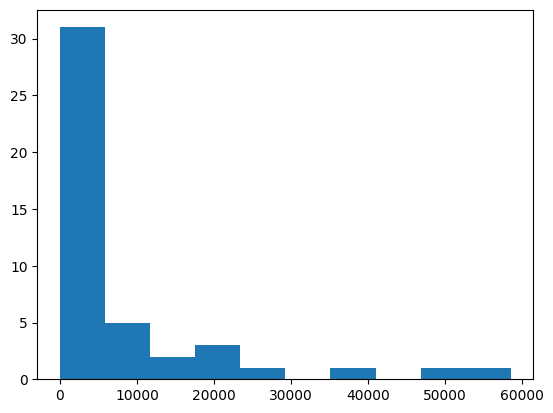

count    33.000000
mean      7.666667
std       7.364046
min       1.000000
25%       2.000000
50%       6.000000
75%      11.000000
max      24.000000
Name: age, dtype: float64


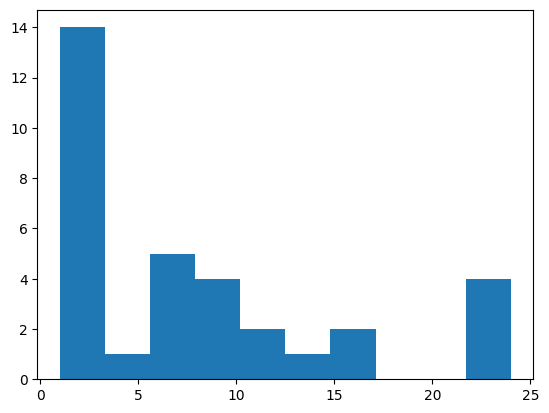

In [ ]:
#explore data frame
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show() #what does this do? did not make a difference
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [ ]:
#further exploration...types + price
df.loc[:, ['price', 'types']].groupby('types').describe()


price                                                                 \
        count          mean          std      min      25%      50%      75%   
types                                                                          
g         1.0  58555.000000          NaN  58555.0  58555.0  58555.0  58555.0   
in        5.0   3950.000000     0.000000   3950.0   3950.0   3950.0   3950.0   
iss       1.0   3950.000000          NaN   3950.0   3950.0   3950.0   3950.0   
missing  37.0   7054.081081  9853.410062      0.0   1050.0   3950.0   6955.0   
s         1.0  40000.000000          NaN  40000.0  40000.0  40000.0  40000.0   

                  
             max  
types             
g        58555.0  
in        3950.0  
iss       3950.0  
missing  49000.0  
s        40000.0

In [ ]:
#age by types
df.loc[:, ['age', 'types']].groupby('types').describe()


age                                                 
        count      mean       std  min   25%  50%    75%   max
types                                                         
g         1.0  6.000000       NaN  6.0  6.00  6.0   6.00   6.0
in        5.0  2.000000  0.000000  2.0  2.00  2.0   2.00   2.0
iss       1.0  2.000000       NaN  2.0  2.00  2.0   2.00   2.0
missing  26.0  9.038462  7.722594  1.0  1.25  7.5  13.25  24.0
s         0.0       NaN       NaN  NaN   NaN  NaN    NaN   NaN

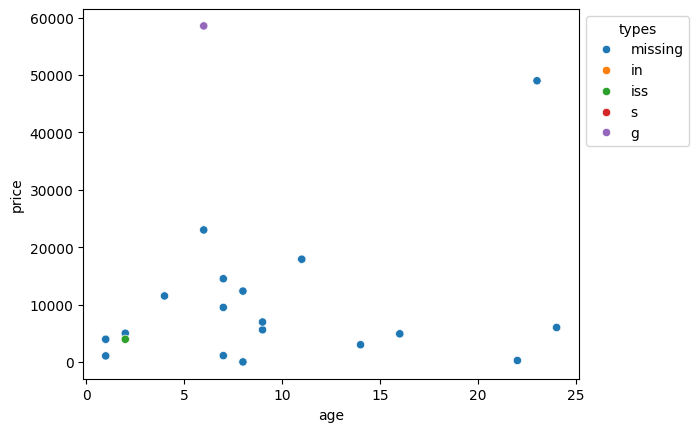

In [ ]:
#another plot
ap = sns.scatterplot(data = df, x='age', y ='price', hue='types')
sns.move_legend(ap, 'upper left', bbox_to_anchor = (1,1)) #bbox to anchor places lenged inside/outside the plot


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


           log_price   log_age
log_price   3.222549  0.122867
log_age     0.122867  1.241095
           log_price   log_age
log_price   1.000000  0.060445
log_age     0.060445  1.000000


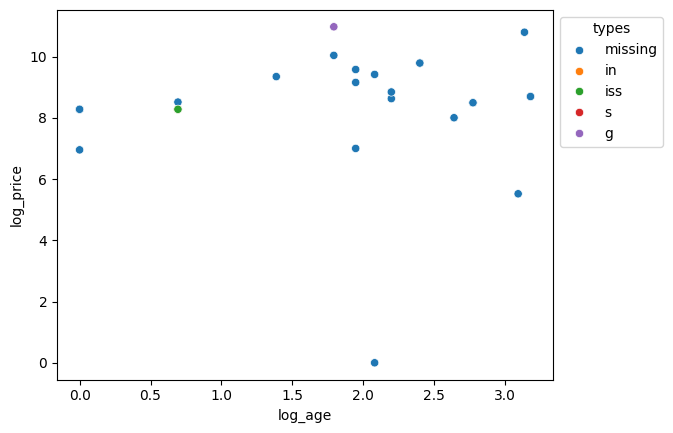

In [ ]:
#plot of different trend/relationship
#use log to show price
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

log_plot = sns.scatterplot(data = df, x = 'log_age', y = 'log_price', hue = 'types')
sns.move_legend(log_plot, 'upper left', bbox_to_anchor = (1,1))


print(df.loc[:, ['log_price', 'log_age']].cov())
print(df.loc[:, ['log_price', 'log_age']].corr())